In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces

# Load Olivetti faces dataset
X, y = fetch_olivetti_faces(return_X_y = True, shuffle = True)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


## Training the models

Let's build a CNN to find patterns in our images, more specifically we need a way to:

* Load our images (already done)
* Preprocess our images
* Build a CNN to find patterns in our images (5 different models to compare results)
* Compile our CNN
* Fit the CNN to our training data
* Evaluate the model (signs of overfitting/underfitting etc.)

### Preprocess the data


In [2]:
# Normalize the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 1.492154    1.0679537   0.88678885 ... -1.2506915  -1.2596444
  -1.3085538 ]
 [ 2.041687    1.7011064   1.3754364  ...  0.86380476  1.7146959
   1.8981247 ]
 [-0.15644519 -0.46034563 -0.55790794 ...  2.053209    2.0076232
   1.3255033 ]
 ...
 [ 0.8739294   0.8932909   0.92928004 ... -0.7661195  -0.5836579
  -0.64431334]
 [ 0.66785455  0.45663416  0.29191384 ...  0.7757008   0.6781834
   0.7070726 ]
 [-0.01906194 -0.35118142 -0.6853812  ...  0.2691027  -0.24566475
  -0.07169213]]


The -1 in the reshape function is a placeholder for an unknown dimension. When you use -1 in a reshape operation, it tells NumPy to automatically compute the size of that particular dimension based on the size of the other dimensions and the total number of elements.

In your case, you have X_train with shape (40, 4096), meaning you have 40 samples with 4096 features each. When you use reshape(-1, 64, 64, 1), you're instructing NumPy to reshape the data into a 4D array with the following dimensions:

The first dimension will be calculated automatically. In this case, it will be 40 since that's the number of samples you have.
The second dimension will be 64 (height).
The third dimension will be 64 (width).
The fourth dimension will be 1 (channel, since you're working with grayscale images).

In [3]:
X = X.reshape(-1, 64, 64)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape)
print(y_train.shape)

(320, 64, 64)
(320,)


In [6]:
# Create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [7]:
print(X_val.shape)
print(y_val.shape)
print(X_train.shape)

(64, 64, 64)
(64,)
(256, 64, 64)


### Build a CNN to find patterns in our images

We will be using the architecture of the TinyVGG from the website https://poloclub.github.io/cnn-explainer/

In [8]:
def buildModel(modelNum):
    if (modelNum == 1):
        return  tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(filters = 30,
                                       kernel_size = 3,
                                       activation = "relu",
                                       input_shape = (64, 64, 1)),
                tf.keras.layers.Conv2D(64, 3, activation = "relu"),
                tf.keras.layers.MaxPool2D(pool_size = 2,
                                          padding = "valid"),
                tf.keras.layers.Conv2D(32, 3, activation = "relu"),
                tf.keras.layers.Conv2D(16, 3, activation = "relu"),
                tf.keras.layers.MaxPool2D(2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Dense(40, activation = "softmax")
                ])
    if (modelNum == 2):
        return tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters = 30,
                                   kernel_size = 3,
                                   activation = "relu",
                                   input_shape = (64, 64, 1)),
            tf.keras.layers.Conv2D(64, 3, activation = "relu"),
            tf.keras.layers.MaxPool2D(pool_size = 2,
                                      padding = "valid"),
            tf.keras.layers.Conv2D(32, 3, activation = "relu"),
            tf.keras.layers.Conv2D(16, 3, activation = "relu"),
            tf.keras.layers.Conv2D(8, 3, activation = "relu"),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(40, activation = "softmax")
            ])
    if modelNum == 3:
        return tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(filters = 30,
                                       kernel_size = 3,
                                       activation = "relu",
                                       input_shape = (64, 64, 1)),
                tf.keras.layers.Conv2D(64, 3, activation = "relu"),
                tf.keras.layers.MaxPool2D(pool_size = 2,
                                          padding = "valid"),
                tf.keras.layers.Conv2D(32, 3, activation = "relu"),
                tf.keras.layers.MaxPool2D(2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Dense(40, activation = "softmax")
            ])
    if modelNum == 4:
        return tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters = 30,
                                   kernel_size = 3,
                                   activation = "relu",
                                   input_shape = (64, 64, 1)),
            tf.keras.layers.Conv2D(64, 3, activation = "relu"),
            tf.keras.layers.MaxPool2D(pool_size = 2,
                                      padding = "valid"),
            tf.keras.layers.Conv2D(32, 3, activation = "relu"),
            tf.keras.layers.Conv2D(16, 3, activation = "relu"),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(40, activation = "relu"),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(40, activation = "softmax")
            ])
    if modelNum == 5:
        return tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters = 8,
                                   kernel_size = 7,
                                   activation = "relu",
                                   input_shape = (64, 64, 1)),
            tf.keras.layers.Conv2D(16, 3, activation = "relu"),
            tf.keras.layers.MaxPool2D(pool_size = 2,
                                      padding = "valid"),
            tf.keras.layers.Conv2D(32, 3, activation = "relu"),
            tf.keras.layers.Conv2D(64, 3, activation = "relu"),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(40, activation = "softmax")
            ])


In [9]:
#set up early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',  # Monitor the validation loss
                        patience=10,           # Number of epochs with no improvement to wait before stopping
                  )


train_loss = []
val_loss = []
model_list = [1,2,3,4,5]

for modelNum in model_list:
            print(f"####### Model {str(modelNum)} #######")
            model = buildModel(modelNum)
            model.compile(loss = "sparse_categorical_crossentropy",
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["accuracy"])
            history = model.fit(X_train, y_train,
                            epochs=20,
                            validation_data=(X_val, y_val),
                            callbacks=[early_stopping])
            # Store the training and validation loss values
            train_loss.append(history.history['loss'])
            val_loss.append(history.history['val_loss'])

            test_loss, test_accuracy = model.evaluate(X_test, y_test)
            print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')





####### Model 1 #######
Epoch 1/20
8/8 [==============================] - 15s 2s/step - loss: 3.6406 - accuracy: 0.0742 - val_loss: 3.4585 - val_accuracy: 0.0938
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 2.7748 - accuracy: 0.3125 - val_loss: 2.4217 - val_accuracy: 0.3438
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: 1.0681 - accuracy: 0.7695 - val_loss: 1.5581 - val_accuracy: 0.6875
Epoch 4/20
8/8 [==============================] - 5s 615ms/step - loss: 0.3803 - accuracy: 0.9023 - val_loss: 0.9543 - val_accuracy: 0.7344
Epoch 5/20
8/8 [==============================] - 4s 566ms/step - loss: 0.2012 - accuracy: 0.9336 - val_loss: 0.7551 - val_accuracy: 0.8125
Epoch 6/20
8/8 [==============================] - 6s 757ms/step - loss: 0.0580 - accuracy: 0.9805 - val_loss: 0.8591 - val_accuracy: 0.8281
Epoch 7/20
8/8 [==============================] - 4s 547ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.8798 - val_accuracy: 0.8281
Epoc

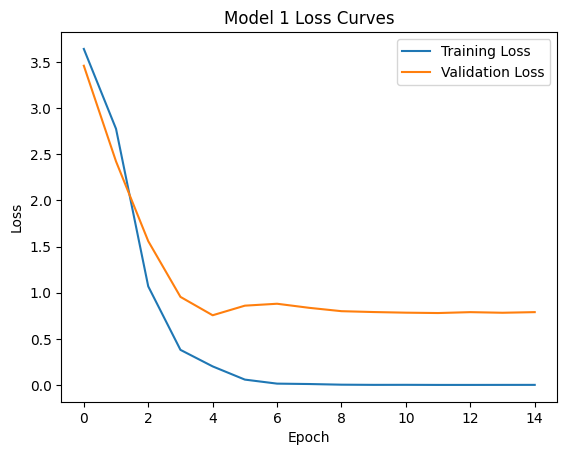

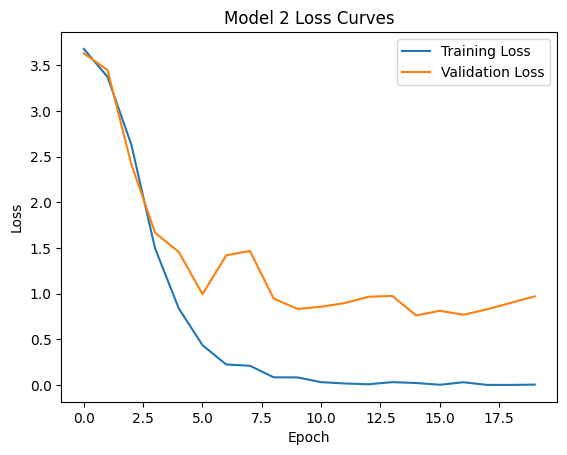

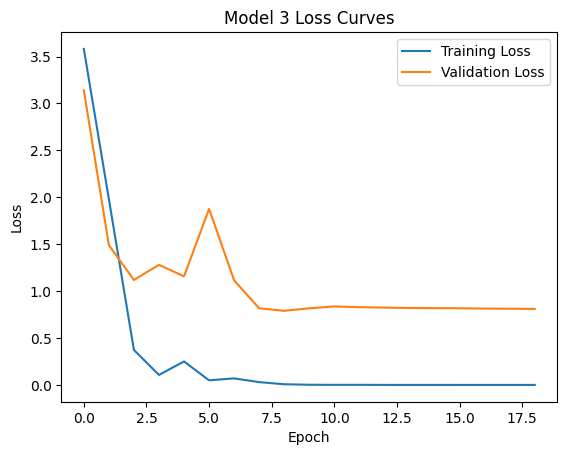

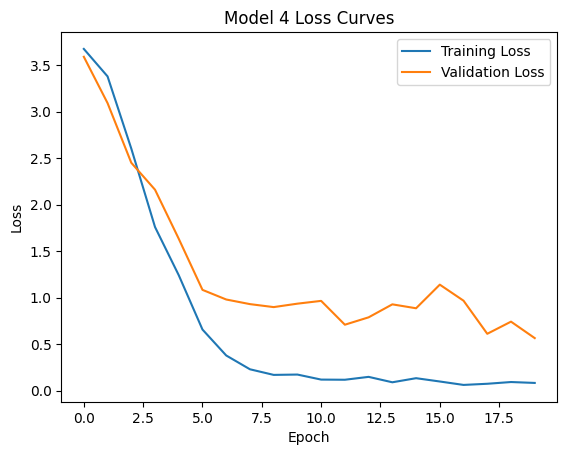

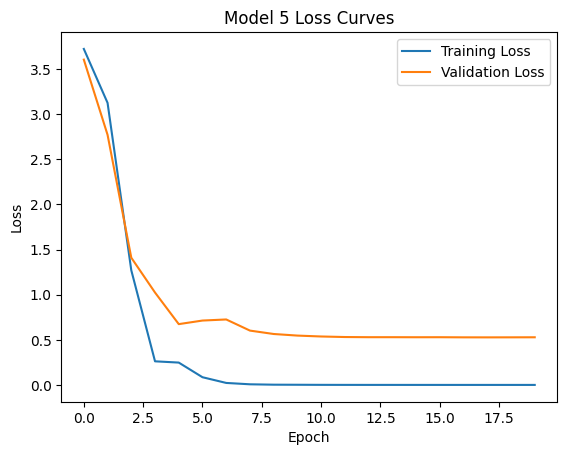

In [10]:
for modelNum in range(5):
    plt.figure()
    plt.plot(train_loss[modelNum], label='Training Loss')
    plt.plot(val_loss[modelNum], label='Validation Loss')
    plt.title(f'Model {modelNum+1} Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print('\n')

## Results


The best model is the first one with 95% accuracy and a test loss of 0.1216912716627121. As seen from the graph there is a bit of overfitting happening on all models including the first one.